# Results

In [1]:
import os
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

df_data = pd.read_csv(os.path.join('..', '..', '..', 'resources', "compressed_images.csv"))

df_data.head()

subjectID  site    age  df_comp_1  gm_comp_1  wm_comp_1  csf_comp_1  \
0   sub-256    HH  27.38  -1.299959   1.493881   2.118407   -1.402236   
1   sub-332   IOP  42.37   0.094058  -0.395575  -1.058985    0.283817   
2   sub-541   IOP  36.42  -0.742552   0.325113  -0.772167   -1.127778   
3   sub-043  Guys  22.65  -1.015449   1.357072  -0.715433   -1.518454   
4   sub-022  Guys  30.67   0.344976   1.282205   1.484323    1.181775   

   df_comp_2  gm_comp_2  wm_comp_2  csf_comp_2  
0   0.983905  -1.425386  -0.569065    0.620575  
1  -1.981011   0.442281  -0.075717   -1.461559  
2  -0.817974  -0.406767  -0.788280    0.098370  
3   1.500735  -1.607872  -1.068050    1.333944  
4   0.801336   1.847277  -0.994154    0.239034

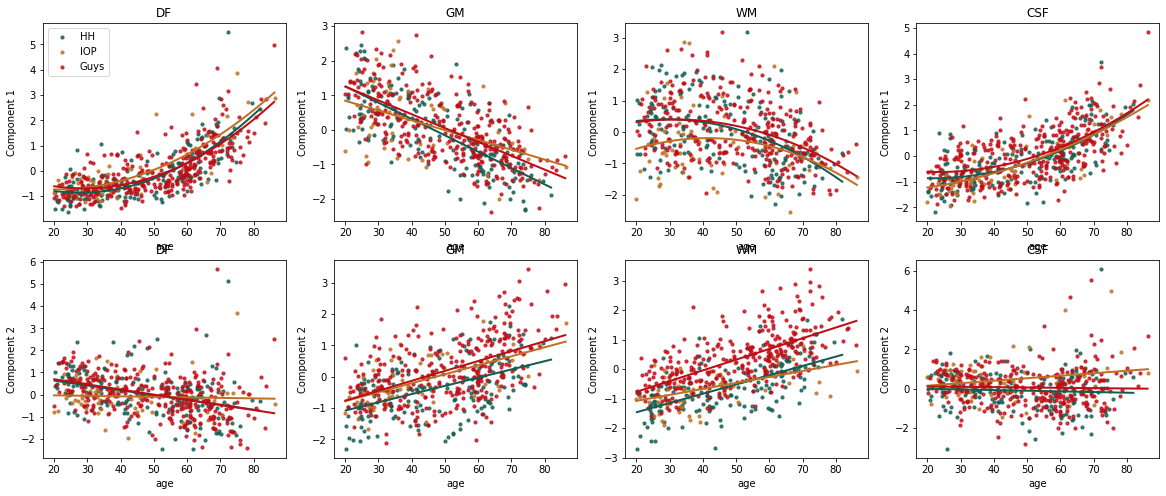

In [6]:
effect = "site"

order_mod = {"df": [2, 1], "gm": [1, 1], "wm": [2, 1], "csf": [2, 1]}

n_comps = 2
n_col = len(order_mod)
total_display = n_col*n_comps

n_rows = int(total_display/n_col)




color_palette = ["#135D50", "#BF7025", "#C00C16"]

f = plt.figure(figsize=(5*n_col, 4*n_rows))
f.tight_layout()
for comp in range(n_comps):
    for i, ext in enumerate(order_mod):

        f.add_subplot(n_rows, n_col, n_col*comp+i+1)
        for k, effect_i in enumerate(df_data[effect].unique()):
            sns.regplot(data=df_data.loc[df_data[effect] == effect_i], x = 'age', y = f'{ext}_comp_{comp+1}', color=color_palette[k],
                        order=order_mod[ext][comp], label=effect_i, ci=None, scatter_kws={'s':10}, line_kws={'linewidth':2})
        plt.title(f'{ext.upper()}')
        plt.ylabel(f'Component {comp+1}')
        plt.ticklabel_format(axis='y', scilimits=(0, 0))

        if comp != 0 or i != 0:
            plt.legend().remove()
        else:
            plt.legend()